# Decision Theory

* https://docs.python.org/3/library/statistics.html

In [8]:
import random
import numpy as np
import scipy.stats as st
import pandas as pd
import warnings
import itertools
import statistics

import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

## Premise

Given a population with certain parameters:

$$ X_n = \{ x_1, x_2, x_3 ... x_n \} $$

$$ \mu = \sum_{i=1}^{n}{ X_i } $$

$$ σ^2 = \frac{ \sum_{i=1}^{n}{(Xi - \mu)^2} }{n} $$

A sample (or samples) is obtained:

$$ X_m = \{ x_1, x_2, x_3 ... x_m \} $$

$$ m \leqslant n $$

$$ X_m \subseteq X_n $$

The goal is to obtain information, with a minimum level of confidence, from the population.

These are the options:

* https://en.wikipedia.org/wiki/Estimator
* https://en.wikipedia.org/wiki/Confidence_interval
* https://en.wikipedia.org/wiki/Robust_statistics
* https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

# Estimators

#### Consistency

A consistent sequence of estimators is a sequence of estimators that converge in probability to the quantity being estimated as the index (usually the sample size) grows without bound. In other words, increasing the sample size increases the probability of the estimator being close to the population parameter.

$$ \lim_{n \to \infty} P(|\mu - \overline{x}|< \epsilon) = 1 $$

#### Asymptotic normality

Maximum likelihood estimators are asymptotically normal under fairly weak regularity conditions. An asymptotically normal estimator is a consistent estimator whose distribution around the true parameter `θ` approaches a normal distribution with standard deviation shrinking in proportion to ${\displaystyle 1/{\sqrt {n}}}1/{\sqrt {n}}$ as the sample size n grows.

#### Efficiency

Two naturally desirable properties of estimators are for them to be unbiased and have minimal mean squared error (MSE). Among unbiased estimators, there often exists one with the lowest variance, called the minimum variance unbiased estimator (MVUE).

#### Sufficiency

A sufficient statistic is a statistic that summarizes all of the information in a sample about a chosen parameter. For example, the sample mean, x̄, estimates the population mean, μ. x̄ is a sufficient statistic if it retains all of the information about the population mean that was contained in the original data points.

#### Shrinkage

Shrinkage is where extreme values in a sample are “shrunk” towards a central value, like the sample mean. 

#### Estimation of Population Mean using the Mean of Sample Means

$$ \mu \sim \overline{x} = \sum_{i=1}^{n}{ \overline{X_i} } $$

#### Estimation of Population Variance using the Variance of Sample Means

$$ \frac{ σ^2 }{n} \sim S^2_{\overline{X}} = \frac{ \sum_{i=1}^{n}{(\overline{Xi} - \overline{\overline{X}})^2} }{n} $$

#### Estimation of Population Variance using the Mean of Sample Variances

$$ σ^2 \times \frac{ (n - 1) }{n} \sim \overline{X_{S^2}} = \frac{ \sum_{i=1}^{n}{ S^2_i }}{n} $$

In [3]:
def approximate(sample_size: int = 3, population_size: int = 10, total_samples: int = -1) -> dict:
    assert sample_size < population_size
    Z: dict = {}
    Z['population_size'] = population_size
    Z['sample_size'] = sample_size
    Z['population_size'] = population_size
    # Population metrics
    population: np.array = np.linspace(0, 100, population_size)
    Z['population_mean'] = np.mean(population)
    Z['population_var'] = np.var(population)
    # Sample metrics
    means: list = []
    variances: list = []
    for sample in itertools.combinations(population, sample_size):
        means.append(np.mean(sample))
        variances.append(np.var(sample))
    means = np.array(means)
    np.random.shuffle(means)
    means = means[:total_samples]
    variances = np.array(variances)
    np.random.shuffle(variances)
    variances = variances[:total_samples]
    Z['observations'] = means.shape[0]
    Z['mean_of_means'] = np.mean(means)
    Z['mean_of_variances'] = np.mean(variances)
    Z['variance_of_means'] = np.var(means)
    return Z

#### Approximating Population metrics as Population Size increases

5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 

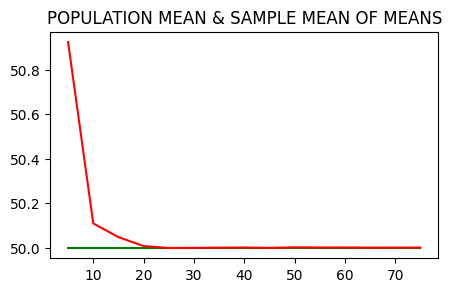

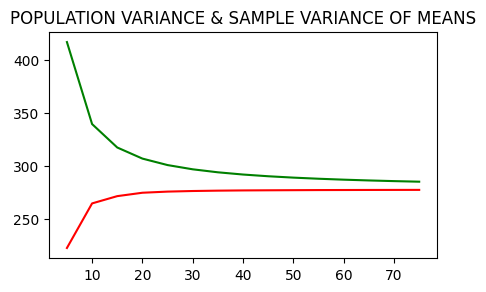

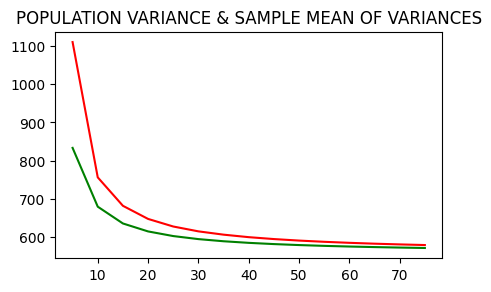

In [4]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for population_size in range(5, 80, 5):
    print(population_size, end=' ')
    z: dict = approximate(sample_size=3, population_size=population_size, total_samples=-1)
    X.append(population_size)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()

#### Approximating Population metrics as Sample Size increases

3 4 5 6 7 8 

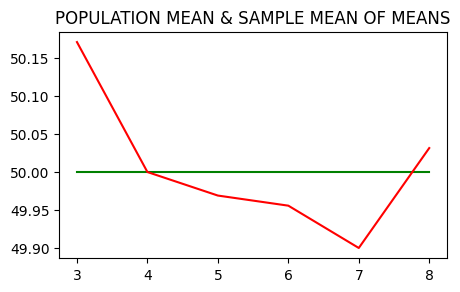

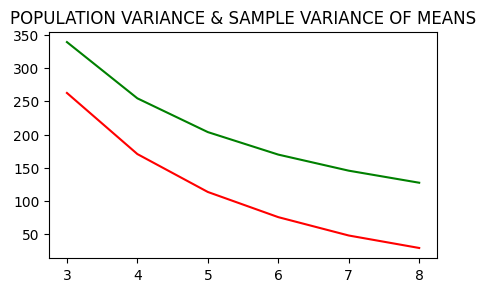

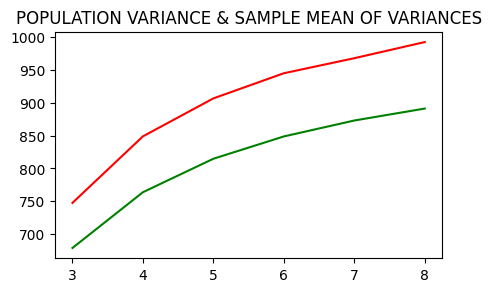

In [5]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for sample_size in range(3, 9):
    print(sample_size, end=' ')
    z: dict = approximate(sample_size=sample_size, population_size=10, total_samples=-1)
    X.append(sample_size)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()

#### Approximating Population metrics as Amount of Samples increases

3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

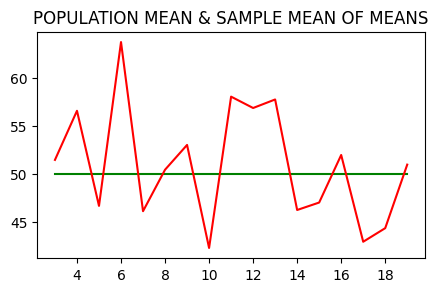

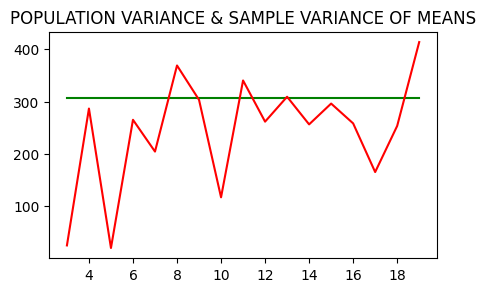

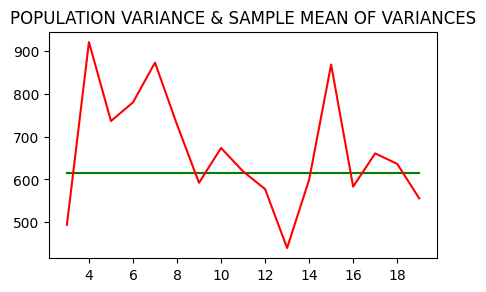

In [7]:
X: list = []
sample_mean_of_means: list = []
population_means: list = []
sample_mean_of_variances: list = []
population_vars1: list = []
population_vars2: list = []
sample_variance_of_means: list = []

for total_samples in range(3, 20):
    print(total_samples, end=' ')
    z: dict = approximate(sample_size=3, population_size=20, total_samples=total_samples)
    X.append(total_samples)
    population_means.append(z['population_mean'])
    population_vars1.append(z['population_var'] / z['sample_size'])
    population_vars2.append(z['population_var'] * (z['sample_size'] - 1) / z['sample_size'])
    sample_mean_of_variances.append(z['mean_of_variances'])
    sample_mean_of_means.append(z['mean_of_means'])
    sample_variance_of_means.append(z['variance_of_means'])

# Approximating Population Mean using Sample Mean of Means
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_means, color='green')
axes.plot(X, sample_mean_of_means, color='red')
axes.set_title('POPULATION MEAN & SAMPLE MEAN OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars1, color='green')
axes.plot(X, sample_variance_of_means, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE VARIANCE OF MEANS')
figure.show()

# Approximating Population Variance using Sample Mean of Variances
figure: Figure = plt.figure(dpi=100, figsize=(5, 3))
axes: Axes = figure.add_subplot()
axes.plot(X, population_vars2, color='green')
axes.plot(X, sample_mean_of_variances, color='red')
axes.set_title('POPULATION VARIANCE & SAMPLE MEAN OF VARIANCES')
figure.show()

# Robust Estimators

* https://en.wikipedia.org/wiki/Robust_statistics

Robust statistics are statistics with good performance for data drawn from a wide range of probability distributions, especially for distributions that are not normal. One motivation is to produce statistical methods that are not unduly affected by outliers. Another motivation is to provide methods with good performance when there are small departures from parametric distribution. There are various definitions of a "robust statistic." Strictly speaking, a robust statistic is resistant to errors in the results, produced by deviations from assumptions (e.g., of normality).

This means that if the assumptions are only approximately met, the robust estimator will still have a reasonable efficiency, and reasonably small bias, as well as being asymptotically unbiased, meaning having a bias tending towards 0 as the sample size tends towards infinity. By contrast, more robust estimators that are not so sensitive to distributional distortions such as longtailedness are also resistant to the presence of outliers. Thus, in the context of robust statistics, distributionally robust and outlier-resistant are effectively synonymous.

#### Breakdown Point

Intuitively, the breakdown point of an estimator is the proportion of incorrect observations (e.g. arbitrarily large observations) an estimator can handle before giving an incorrect (e.g., arbitrarily large) result.

The higher the breakdown point of an estimator, the more robust it is. Intuitively, we can understand that a breakdown point cannot exceed 50% because if more than half of the observations are contaminated, it is not possible to distinguish between the underlying distribution and the contaminating distribution

#### Mean vs Median & Trimmed Mean

The mean is not a robust measure of central tendency. If the dataset is e.g. the values `{2,3,5,6,9}`, then if we add another datapoint with value `-1000` or `+1000` to the data, the resulting mean will be very different to the mean of the original data. Similarly, if we replace one of the values with a datapoint of value `-1000` or `+1000` then the resulting mean will be very different to the mean of the original data.

The median is a robust measure of central tendency. Taking the same dataset `{2,3,5,6,9}`, if we add another datapoint with value `-1000` or `+1000` then the median will change slightly, but it will still be similar to the median of the original data. If we replace one of the values with a datapoint of value `-1000` or `+1000` then the resulting median will still be similar to the median of the original data.

Described in terms of breakdown points, the *median* has a breakdown point of `50%`, while the *mean* has a breakdown point of `1/N`, where `N` is the number of original datapoints (a single large observation can throw it off).

In [42]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print('DATASET:', dataset)
print('MEDIAN:', statistics.median(dataset))
print('MEAN:', statistics.mean(dataset))
print('TRIMMED MEAN:', st.trim_mean(dataset, 0.1))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
MEDIAN: 5.5
MEAN: 5.5
TRIMMED MEAN: 5.5


In [43]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]

print('DATASET:', dataset)
print('MEDIAN:', statistics.median(dataset))
print('MEAN:', statistics.mean(dataset))
print('TRIMMED MEAN:', st.trim_mean(dataset, 0.1))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]
MEDIAN: 6
MEAN: 95.9090909090909
TRIMMED MEAN: 6.0


In [44]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 1000]

print('DATASET:', dataset)
print('MEDIAN:', statistics.median(dataset))
print('MEAN:', statistics.mean(dataset))
print('TRIMMED MEAN:', st.trim_mean(dataset, 0.1))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 1000]
MEDIAN: 6.5
MEAN: 171.25
TRIMMED MEAN: 105.4


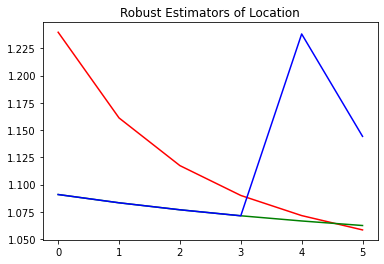

In [49]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

mean: float = statistics.mean(dataset)
median: float = statistics.median(dataset)
trim: float = st.trim_mean(dataset, 0.3)
    
mean_variation: list = []
median_variation: list = []
trim_variation: list = []

for _ in range(int(len(dataset)/2) + 1):
    dataset.append(20)
    new_mean: float = statistics.mean(dataset)
    new_median: float = statistics.median(dataset)
    new_trim: float = st.trim_mean(dataset, 0.3)
    mean_variation.append(new_mean / mean)
    median_variation.append(new_median / median)
    trim_variation.append(new_trim / trim)
    mean = new_mean
    median = new_median
    trim = new_trim

plt.plot(mean_variation, color='red')
plt.plot(median_variation, color='green')
plt.plot(trim_variation, color='blue')
plt.title('Robust Estimators of Location')
plt.show()

#### Median Absolute Deviation & Interquartile Range vs Standard Deviation

The median absolute deviation and interquartile range are robust measures of statistical dispersion, while the standard deviation and range are not.

$$ MAD = median( \sum_{i=1}^{n} { |x_i - \overline{x}| }) $$

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_absolute_deviation.html
* https://en.wikipedia.org/wiki/Median_absolute_deviation

In [14]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
print('DATASET:', dataset)
print('STANDARD DEVIATON:', statistics.stdev(dataset))
print('MEDIAN ABSOLUTE DEVIATION:', st.median_absolute_deviation(dataset))
print('INTERQUARTILE RANGE:', st.iqr(dataset))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
STANDARD DEVIATON: 3.0276503540974917
MEDIAN ABSOLUTE DEVIATION: 3.7064999999999997
INTERQUARTILE RANGE: 4.5


In [15]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]
    
print('DATASET:', dataset)
print('STANDARD DEVIATON:', statistics.stdev(dataset))
print('MEDIAN ABSOLUTE DEVIATION:', st.median_absolute_deviation(dataset))
print('INTERQUARTILE RANGE:', st.iqr(dataset))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]
STANDARD DEVIATON: 299.8667886063592
MEDIAN ABSOLUTE DEVIATION: 4.4478
INTERQUARTILE RANGE: 5.0


In [16]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 1000]
    
print('DATASET:', dataset)
print('STANDARD DEVIATON:', statistics.stdev(dataset))
print('MEDIAN ABSOLUTE DEVIATION:', st.median_absolute_deviation(dataset))
print('INTERQUARTILE RANGE:', st.iqr(dataset))

DATASET: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1000, 1000]
STANDARD DEVIATON: 387.11828706716784
MEDIAN ABSOLUTE DEVIATION: 4.4478
INTERQUARTILE RANGE: 5.5


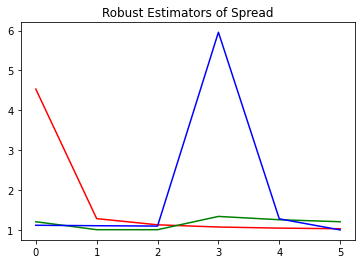

In [40]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

stdev: float = statistics.stdev(dataset)
mad: float = st.median_absolute_deviation(dataset)
iqr: float = st.iqr(dataset)
    
stdev_variation: list = []
mad_variation: list = []
iqr_variation: list = []

for _ in range(int(len(dataset)/2) + 1):
    dataset.append(50)
    new_stdev: float = statistics.stdev(dataset)
    new_mad: float = st.median_absolute_deviation(dataset)
    new_iqr: float = st.iqr(dataset)
    stdev_variation.append(new_stdev / stdev)
    mad_variation.append(new_mad / mad)
    iqr_variation.append(new_iqr / iqr)
    stdev = new_stdev
    mad = new_mad
    iqr = new_iqr

plt.plot(stdev_variation, color='red')
plt.plot(mad_variation, color='green')
plt.plot(iqr_variation, color='blue')
plt.title('Robust Estimators of Spread')
plt.show()

#### Harmonic Mean

Since the harmonic mean of a list of numbers tends strongly toward the least elements of the list, it tends (compared to the arithmetic mean) to mitigate the impact of large outliers and aggravate the impact of small ones.

* https://docs.python.org/3/library/statistics.html#statistics.harmonic_mean

$$ \overline{x_h} = \frac{ |X| }{ \sum_{i=0}^{|X|} { \frac{1}{Xi} } } $$

In [54]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
mean: float = statistics.mean(dataset)
hmean: float = statistics.harmonic_mean(dataset)
    
print('MEAN:', mean)
print('HARMONIC MEAN:', hmean)

MEAN: 5.5
HARMONIC MEAN: 3.414171521474055


#### Geometric Mean

In many cases the geometric mean is the best measure to determine the average growth rate of some quantity. (For example, if in one year sales increases by 80% and the next year by 25%, the end result is the same as that of a constant growth rate of 50%, since the geometric mean of 1.80 and 1.25 is 1.50.).

The geometric mean is often used for a set of numbers whose values are meant to be multiplied together or are exponential in nature, such as a set of growth figures: values of the human population or interest rates of a financial investment over time.

* https://docs.python.org/3/library/statistics.html#statistics.geometric_mean
* https://en.wikipedia.org/wiki/Geometric_mean

$$ \overline{x_g} = (\prod_{i=1}^N x_i)^{1/n} $$

In [55]:
dataset: list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
mean: float = statistics.mean(dataset)
gmean: float = statistics.geometric_mean(dataset)
    
print('MEAN:', mean)
print('HARMONIC MEAN:', gmean)

MEAN: 5.5
HARMONIC MEAN: 4.528728688116765
